<a href="https://colab.research.google.com/github/Kevin-Arnold-Traverso/GEOGloWS/blob/main/Copia_de_Uso_de_la_API_GEOGloWS_ECMWF_Streamflow_Services_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GEOGloWS ECMWF Streamflow Services - Perú**

GEOGloWS ECMWF Streamflow Services (GESS) es un modelo hidrológico global que provee a los usuarios:

1.   **Un ensamble de pronóstico de caudales a corto plazo de 51 miembros con un horizonte de 15 días**. La resolución temporal del pronóstico varía con los días en avance del mismo. Los primeros 6 días tienen una resolución temporal de 3 horas. De los días 7 al día 15 la resolución temporal es de 6 horas.
2.   **Un pronóstico de caudales a corto plazo de alta resolución con un horizonte de 10 días**. La resolución temporal del pronóstico varía con los días en avance del mismo. Los primeros 4 días tienen una resolución temporal de 1 hora. Los días 5 y 6 tienen una resolución temporal es de 3 horas. De los días 7 al día 10 la resolución temporal es de 6 horas.
3.   **Una simulación histórica de caudales del 01/01/1979 al 31/12/2018 a resolución diaria**.

El pronóstico hidrológico es calculado a partir del sistema de pronósticos meteorológicos del ECMWF, el cual tiene 51 miembros de 18 km de resolución para los primeros 10 días (días 1 al 10) y 36km de resolución para los siguientes 5 días (días del 11 al 15). Estos pronósticos meteorológicos son convertidos en escorrentía utilizando el modelo hidrológico HTESSEL. Posteriormente estos resultados son bajados de escala utilizando una metodología de ponderación por área de cuadrícula a vector, para posteriormente utilizando el modelo RAPID ser transitados a través de la red de drenaje.

Adicionalmente, se tiene una simulación histórica que se utilizó para definir los períodos de retorno con los que se establecen los niveles de alerta que se tiene en cada tramo de río simulado. Esta simulación histórica se basa en el reánalisis ERA5, los cuales son convertidos a escorrentía con el modelo HTESSEL. A estos valores de escorrentía se les reduce la escala y transitados utilizando el modelo RAPID. Posteriormente a los resultados de esta simulación histórica se le calculan los valores de caudal correspondientes a 2, 5, 10, 25, 50 y 100 años utilizando la distribución de probabilidad gumbel.

Estos servicios están disponibles para casi todos los ríos del mundo con áreas de drenaje menores de 200km2. A continuación, se muestra las áreas donde se está corrriendo el modelo en la actualidad.

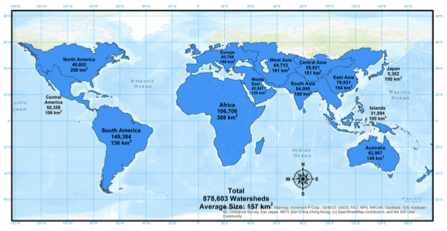

Estos servicios globales son fácilmente personalizables para una región, país o cuenca de interés. El primer paso es la extacción de los tramos de río a la zona de interés. A continuación se muestra el proceso de cómo se hizo para Perú.

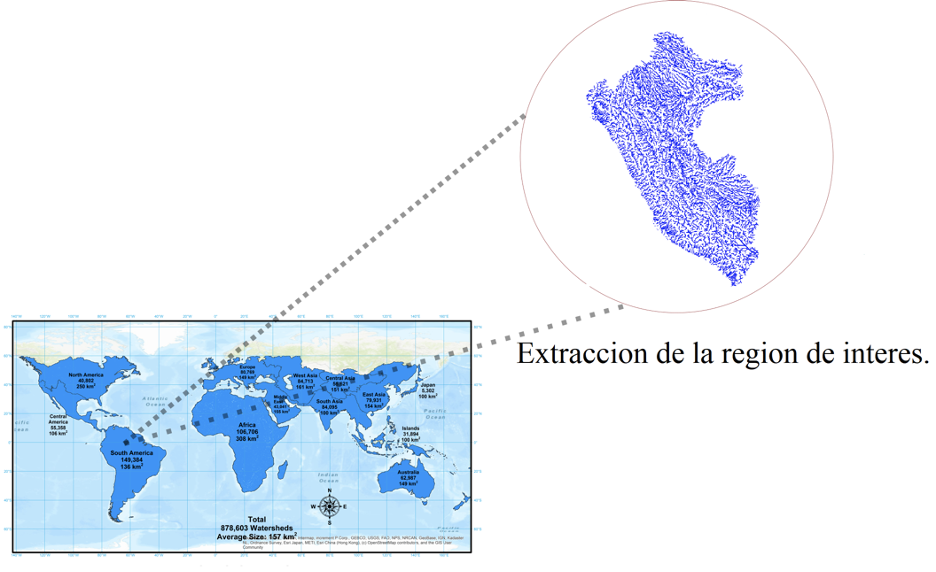




La red de ríos delimitada para Perú se puede descargar en los link a continuación:

Shapefile: https://drive.google.com/file/d/17zjBkdRqt2gBwa20kcqRBRneLN5OKCZM/view?usp=sharing

GeoJSON: https://drive.google.com/file/d/1eS57RJiv4TezRma-gzPq8QvIubkTT9QL/view?usp=sharing

Al abrir la tabla de atributos del shapefile, debería existir un atributo llamado COMID. Este valor COMID, es el parámetro principal para hacer el uso de la REST API del GESS.

La documentación para el uso de la API de GESS está disponible en https://geoglows.ecmwf.int/documentation.

# **Paquetes de Python a utilizar**

En el desarrollo de este tutorial, se utilizarán las siguientes librerías.

1.   requests
2.   datetime
3.   plotly
4.   io
5.   pandas
6.   geoglows
7.   hydrostats
8.   numpy

In [1]:
!pip install geoglows

import requests
import datetime as dt
import plotly.graph_objs as go
import io
import pandas as pd
import geoglows
import hydrostats.data
import numpy as np

     |████████████████████████████████| 15.4MB 276kB/s 
     |████████████████████████████████| 13.2MB 341kB/s 
  Created wheel for HydroErr: filename=HydroErr-1.24-cp37-none-any.whl size=20206 sha256=8a700845daddc14a5d1008721416d32c297b7a91c28e620ac99931667e9aab94
  Stored in directory: /root/.cache/pip/wheels/b0/6a/72/a08200d2b6d8453d4021a86d8d6e49c0b1c72ed023127789a2
  Created wheel for hydrostats: filename=hydrostats-0.78-cp37-none-any.whl size=33260 sha256=595017ae959044cd06e510be7bdd5f24c8aab7de23e27d7e4105fe5d7e077713
  Stored in directory: /root/.cache/pip/wheels/cd/4a/fc/a9aca96879ae374d7816db96e72b6bf5d0ac88d064f362064f
Successfully built HydroErr hydrostats
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **Simulación Histórica**

Para obtener la simulación histórica de cualquier tramo de río se necesita el comid correspondiente. La REST API generará un link en el cual nos permite la descarga de la simulación histórica en formato csv o en formato json según sea el interés del usuario.

Con el shapefile anterior, seleccionen el tramo de río de interés y obtengan el COMID correspondiente. En el tutorial vamos a usar el siguiente comid = 9038269, que corresponde al río Amazonas en Tamshiyacu.

La url generada para obtener la simulación histórica tiene la siguiente forma:
https://geoglows.ecmwf.int/api/HistoricSimulation/?reach_id={COMID}&return_format={formato}


El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

In [2]:
comid = 9038269

In [3]:
era_res = requests.get('https://geoglows.ecmwf.int/api/HistoricSimulation/?reach_id={0}&return_format=csv'.format(comid), verify=False).content
simulated_df = pd.read_csv(io.StringIO(era_res.decode('utf-8')), index_col=0)
simulated_df[simulated_df < 0] = 0
simulated_df.index = pd.to_datetime(simulated_df.index)
simulated_df.index = simulated_df.index.to_series().dt.strftime("%Y-%m-%d")
simulated_df.index = pd.to_datetime(simulated_df.index)

print (simulated_df)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning:

Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



ParserError: ignored

# **Períodos de Retorno**
La REST API generará un link en el cual nos permite la descarga de los caudales de los períodos de retorno de 2, 5, 10, 25, 50 y 100 años de la simulación histórica en formato csv o en formato json según sea el interés del usuario.

La url generada tiene la siguiente forma: https://geoglows.ecmwf.int/api/ReturnPeriods/?reach_id={COMID}&return_format={formato}

El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

In [ ]:
rp_res = requests.get('https://geoglows.ecmwf.int/api/ReturnPeriods/?reach_id={0}&return_format=csv'.format(comid), verify=False).content
rperiods_df = pd.read_csv(io.StringIO(rp_res.decode('utf-8')), index_col=0)

print(rperiods_df)

# **Gráficos**
El paquete de python Geoglows ha sido creado para manipular los resultados de la api de una manera más sencilla.

La función geoglows.plots.historic_simulation(simulated_df, rperiods_df, titles) que tiene como parámetros de entrada el dataframe de la simulación histórica el cual es necesario, el dataframe de los períodos de retorno de manera opcional y un diccionaro con los elementos que queremos incluir en el título de la gráfica, el cual también es opcional.

In [ ]:
hydroviewer_figure = geoglows.plots.historic_simulation(simulated_df)
hydroviewer_figure.show()

In [ ]:
hydroviewer_figure = geoglows.plots.historic_simulation(simulated_df, rperiods_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

## **Estadísticas a partir de la simulación histórica**

A partir de la simulación histórica podemos obtener estadísticas de series de tiempo, tales como la curva de duración de caudales, la estacionalidad diaria, la estacionalidad mensual entre otras.

A continuación se muestra el uso de los paquetes hydrostats y geoglows en la obtención de los valores y la generación de las gráficas.

In [ ]:
hydroviewer_figure = geoglows.plots.flow_duration_curve(simulated_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

In [ ]:
monavg_df = hydrostats.data.monthly_average(simulated_df)
hydroviewer_figure = geoglows.plots.monthly_averages(monavg_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

In [ ]:
dayavg_df = hydrostats.data.daily_average(simulated_df, rolling=True)
hydroviewer_figure = geoglows.plots.daily_averages(dayavg_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

Las gráficas generadas por el paquete geoglows, se pueden personalizar con otros estádisticos en función de los intereses de los usuarios utilizando las propiedades de python.

In [ ]:
monthly = simulated_df.groupby(simulated_df.index.strftime("%m"))
monmin_df = monthly.min()
monmax_df = monthly.max()
mon25_df = monthly.quantile(0.25)
mon75_df = monthly.quantile(0.75)


hydroviewer_figure = geoglows.plots.monthly_averages(monavg_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})

hydroviewer_figure.add_trace(go.Scatter(
    name='Maximum & Minimum Flow',
    x=pd.to_datetime(np.concatenate([monmax_df.index, monmin_df.index[::-1]]), format='%m').strftime('%B'),
    y=np.concatenate([monmax_df.iloc[:, 0].values, monmin_df.iloc[:, 0].values[::-1]]),
    legendgroup='boundaries',
    fill='toself',
    line=dict(color='lightblue', dash='dash'),
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Maximum',
    x=pd.to_datetime(monmax_df.index, format='%m').strftime('%B'),
    y=monmax_df.iloc[:, 0].values,
    legendgroup='boundaries',
    showlegend=False,
    line=dict(color='lightblue', dash='dash')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Minimum',
    x=pd.to_datetime(monmin_df.index, format='%m').strftime('%B'),
    y=monmin_df.iloc[:, 0].values,
    legendgroup='boundaries',
    showlegend=False,
    line=dict(color='lightblue', dash='dash')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='25-75 Percentile Flow',
    x=pd.to_datetime(np.concatenate([mon75_df.index, mon25_df.index[::-1]]), format='%m').strftime('%B'),
    y=np.concatenate([mon75_df.iloc[:, 0].values, mon25_df.iloc[:, 0].values[::-1]]),
    legendgroup='percentile_flow',
    line=dict(color='lightgreen'),
    fill='toself',
))

hydroviewer_figure.add_trace(go.Scatter(
    name='75%',
    x=pd.to_datetime(mon75_df.index, format='%m').strftime('%B'),
    y=mon75_df.iloc[:, 0].values,
    legendgroup='percentile_flow',
    showlegend=False,
    line=dict(color='lightgreen')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='25%',
    x=pd.to_datetime(mon25_df.index, format='%m').strftime('%B'),
    y=mon25_df.iloc[:, 0].values,
    legendgroup='percentile_flow',
    showlegend=False,
    line=dict(color='lightgreen')
))

hydroviewer_figure.show()

In [ ]:
daily = simulated_df.groupby(simulated_df.index.strftime("%m/%d"))
daymin_df = daily.min()
daymax_df = daily.max()
day25_df = daily.quantile(0.25)
day75_df = daily.quantile(0.75)


hydroviewer_figure = geoglows.plots.daily_averages(dayavg_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})

hydroviewer_figure.add_trace(go.Scatter(
    name='Maximum & Minimum Flow',
    x=np.concatenate([daymax_df.index, daymin_df.index[::-1]]),
    y=np.concatenate([daymax_df.iloc[:, 0].values, daymin_df.iloc[:, 0].values[::-1]]),
    legendgroup='boundaries',
    fill='toself',
    line=dict(color='lightblue', dash='dash'),
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Maximum',
    x=daymax_df.index,
    y=daymax_df.iloc[:, 0].values,
    legendgroup='boundaries',
    showlegend=False,
    line=dict(color='lightblue', dash='dash')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Minimum',
    x=daymin_df.index,
    y=daymin_df.iloc[:, 0].values,
    legendgroup='boundaries',
    showlegend=False,
    line=dict(color='lightblue', dash='dash')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='25-75 Percentile Flow',
    x=np.concatenate([day75_df.index, day25_df.index[::-1]]),
    y=np.concatenate([day75_df.iloc[:, 0].values, day25_df.iloc[:, 0].values[::-1]]),
    legendgroup='percentile_flow',
    line=dict(color='lightgreen'),
    fill='toself',
))

hydroviewer_figure.add_trace(go.Scatter(
    name='75%',
    x=day75_df.index,
    y=day75_df.iloc[:, 0].values,
    legendgroup='percentile_flow',
    showlegend=False,
    line=dict(color='lightgreen')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='25%',
    x=day25_df.index,
    y=day25_df.iloc[:, 0].values,
    legendgroup='percentile_flow',
    showlegend=False,
    line=dict(color='lightgreen')
))

hydroviewer_figure.show()

# **Obtener el Pronóstico**

Como mencionamos en la descripción anterior, el pronóstico de caudales generado cuenta con un ensamble de 51 miembros de baja resolución y 1 miembros de alta resolución.

La url generada para obtener el conjunto de ensable de pronóstico tiene la siguiente forma: https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&return_format={formato}

El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

La función geoglows.plots.forecast_ensembles(ensemble_df, rperiods_df, titles) que tiene como parámetros de entrada el dataframe del ensamble de pronóstico, el dataframe de los períodos de retorno y un diccionaro con los elementos que queremos incluir en el título la gráfica, el cual también es opcional.

In [ ]:
ens_res = requests.get('https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={0}&return_format=csv'.format(comid), verify=False).content
ensemble_df = pd.read_csv(io.StringIO(ens_res.decode('utf-8')), index_col=0)
ensemble_df.index = pd.to_datetime(ensemble_df.index)
ensemble_df[ensemble_df < 0] = 0
ensemble_df.index = ensemble_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
ensemble_df.index = pd.to_datetime(ensemble_df.index)

print(ensemble_df)

In [ ]:
hydroviewer_figure = geoglows.plots.forecast_ensembles(ensemble_df, rperiods_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

La REST API nos permite seleccionar un ensamble en partícular, o un rango de ensambles, añadiendo un parámetro adicional a la url  del rest api.

La url generada para obtener el conjunto de ensable deseado de pronóstico tiene la siguiente forma: https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&ensemble={n}&return_format={formato}

El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

El valor n, depende de los ensambles que deseen obtener.

*   Un miembro individual (por ejemplo, 5)
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&ensemble=5&return_format={formato}
*   Un grupo de ensambles no consecutivos (por ejemplo 1,5,9)
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&ensemble=1%2C5%2C9&return_format={formato}
*   Un grupo de ensambles consecutivos (por ejemplo 3-15)
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&ensemble=3-15&return_format={formato}


NOTE: The ensemble member 52 is the high resolution forecast

In [ ]:
ens_5 = requests.get('https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={0}&ensemble=5&return_format=csv'.format(comid), verify=False).content
ens_5_df = pd.read_csv(io.StringIO(ens_5.decode('utf-8')), index_col=0)
ens_5_df.index = pd.to_datetime(ens_5_df.index)
ens_5_df[ens_5_df < 0] = 0
ens_5_df.index = ens_5_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
ens_5_df.index = pd.to_datetime(ens_5_df.index)

print(ens_5_df.head(10))

In [ ]:
ens_1_5_9 = requests.get('https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={0}&ensemble=1%2C5%2C9&return_format=csv'.format(comid), verify=False).content
ens_1_5_9_df = pd.read_csv(io.StringIO(ens_1_5_9.decode('utf-8')), index_col=0)
ens_1_5_9_df.index = pd.to_datetime(ens_1_5_9_df.index)
ens_1_5_9_df[ens_1_5_9_df < 0] = 0
ens_1_5_9_df.index = ens_1_5_9_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
ens_1_5_9_df.index = pd.to_datetime(ens_1_5_9_df.index)

print(ens_1_5_9_df.head(10))

In [ ]:
ens_3_to_15 = requests.get('https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={0}&ensemble=3-15&return_format=csv'.format(comid), verify=False).content
ens_3_to_15_df = pd.read_csv(io.StringIO(ens_3_to_15.decode('utf-8')), index_col=0)
ens_3_to_15_df.index = pd.to_datetime(ens_3_to_15_df.index)
ens_3_to_15_df[ens_3_to_15_df < 0] = 0
ens_3_to_15_df.index = ens_3_to_15_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
ens_3_to_15_df.index = pd.to_datetime(ens_3_to_15_df.index)

print(ens_3_to_15_df.head(10))

# **Estadísticos del Pronóstico**
La REST API nos permite obtener un resumen con los estadísticos del pronósticos.

La url generada para obtener el resumen del ensable de pronóstico tiene la siguiente forma: https://geoglows.ecmwf.int/api/ForecastStats/?reach_id={COMID}&return_format={formato}

El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

La función geoglows.plots.forecast_stats(stats_df, rperiods_df, titles) que tiene como parámetros de entrada el dataframe de las estadísticas del pronóstico, el dataframe de los períodos de retorno y un diccionaro con los elementos que queremos incluir en el título la gráfica, el cual también es opcional.

In [ ]:
ens_stat = requests.get('https://geoglows.ecmwf.int/api/ForecastStats/?reach_id={0}&return_format=csv'.format(comid), verify=False).content
stats_df = pd.read_csv(io.StringIO(ens_stat.decode('utf-8')), index_col=0)
stats_df.index = pd.to_datetime(stats_df.index)
stats_df[stats_df < 0] = 0
stats_df.index = stats_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
stats_df.index = pd.to_datetime(stats_df.index)

print(stats_df.head(10))

In [ ]:
hydroviewer_figure = geoglows.plots.forecast_stats(stats_df, rperiods_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
hydroviewer_figure.show()

# **Registros de Pronósticos**

La REST API permite recuperar el registro continuo de la media del caudal pronósticados durante las primeras 24 horas del pronóstico de cada día. Es decir, cada día después de que se calculan los pronósticos de caudal, el promedio de los primeros 8 pasos de tiempo de 3 horas se registra.

La url que nos permite acceder a estos registros es la siguiente:
https://geoglows.ecmwf.int/api/ForecastRecords/?reach_id={COMID}&return_format={formato}

El COMID dado dependerá del tramo del río y el formato debe ser csv o json.

In [ ]:
record_res = requests.get('https://geoglows.ecmwf.int/api/ForecastRecords/?reach_id={0}&return_format=csv'.format(comid), verify=False).content
records_df = pd.read_csv(io.StringIO(record_res.decode('utf-8')), index_col=0)
records_df.index = pd.to_datetime(records_df.index)
records_df[records_df < 0] = 0
records_df.index = records_df.index.to_series().dt.strftime("%Y-%m-%d %H:%M:%S")
records_df.index = pd.to_datetime(records_df.index)

print(records_df)

Las gráficas generadas por el paquete geoglows para el pronóstico, se pueden personalizar añadiendo otra información disponible como el registro de pronósticos o valores observados si llegaran a estar disponibles.

In [ ]:
hydroviewer_figure = geoglows.plots.forecast_stats(stats=stats_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
x_vals = (stats_df.index[0], stats_df.index[len(stats_df.index) - 1], stats_df.index[len(stats_df.index) - 1], stats_df.index[0])
max_visible = max(stats_df.max())

records_df = records_df.loc[records_df.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
records_df = records_df.loc[records_df.index <= pd.to_datetime(stats_df.index[0] + dt.timedelta(days=2))]

if len(records_df.index) > 0:
  hydroviewer_figure.add_trace(go.Scatter(
      name='1st days forecasts',
      x=records_df.index,
      y=records_df.iloc[:, 0].values,
      line=dict(color='#FFA15A',)
  ))

  x_vals = (records_df.index[0], stats_df.index[len(stats_df.index) - 1], stats_df.index[len(stats_df.index) - 1], records_df.index[0])
  max_visible = max(max(records_df.max()), max_visible)

'''Getting Return Periods'''
r2 = int(rperiods_df.iloc[0]['return_period_2'])

colors = {
    '2 Year': 'rgba(254, 240, 1, .4)',
		'5 Year': 'rgba(253, 154, 1, .4)',
		'10 Year': 'rgba(255, 56, 5, .4)',
		'20 Year': 'rgba(128, 0, 246, .4)',
		'25 Year': 'rgba(255, 0, 0, .4)',
		'50 Year': 'rgba(128, 0, 106, .4)',
		'100 Year': 'rgba(128, 0, 246, .4)',
}

if max_visible > r2:
  visible = True
  hydroviewer_figure.for_each_trace(lambda trace: trace.update(visible=True) if trace.name == "Maximum & Minimum Flow" else (), )
else:
  visible = 'legendonly'
  hydroviewer_figure.for_each_trace(lambda trace: trace.update(visible=True) if trace.name == "Maximum & Minimum Flow" else (), )

def template(name, y, color, fill='toself'):
  return go.Scatter(
      name=name,
			x=x_vals,
			y=y,
			legendgroup='returnperiods',
			fill=fill,
			visible=visible,
			line=dict(color=color, width=0))

r5 = int(rperiods_df.iloc[0]['return_period_5'])
r10 = int(rperiods_df.iloc[0]['return_period_10'])
r25 = int(rperiods_df.iloc[0]['return_period_25'])
r50 = int(rperiods_df.iloc[0]['return_period_50'])
r100 = int(rperiods_df.iloc[0]['return_period_100'])

hydroviewer_figure.add_trace(template('Return Periods', (r100 * 0.05, r100 * 0.05, r100 * 0.05, r100 * 0.05), 'rgba(0,0,0,0)', fill='none'))
hydroviewer_figure.add_trace(template(f'2 Year: {r2}', (r2, r2, r5, r5), colors['2 Year']))
hydroviewer_figure.add_trace(template(f'5 Year: {r5}', (r5, r5, r10, r10), colors['5 Year']))
hydroviewer_figure.add_trace(template(f'10 Year: {r10}', (r10, r10, r25, r25), colors['10 Year']))
hydroviewer_figure.add_trace(template(f'25 Year: {r25}', (r25, r25, r50, r50), colors['25 Year']))
hydroviewer_figure.add_trace(template(f'50 Year: {r50}', (r50, r50, r100, r100), colors['50 Year']))
hydroviewer_figure.add_trace(template(f'100 Year: {r100}', (r100, r100, max(r100 + r100 * 0.05, max_visible), max(r100 + r100 * 0.05, max_visible)), colors['100 Year']))

hydroviewer_figure['layout']['xaxis'].update(autorange=True)
hydroviewer_figure.show()

Otra posibilidad que ofrece el paquete geoglows es crear la tabla con el porcentaje de miembros del ensamble que sobrepasan cierto período de retorno. Esta información es útil para darle mucha mayor credibilidad a las alertas que se puedan emitir en cierto momento.

In [ ]:
from IPython.core.display import display, HTML

In [ ]:
table = geoglows.plots.probabilities_table(stats_df, ensemble_df, rperiods_df)
display(HTML(table))

Adicionalmente, también se puede adicionar la estacionalidad de la simulación histórica como referencia de los valores de pronóstico de caudales.

In [ ]:
hydroviewer_figure = geoglows.plots.forecast_stats(stats=stats_df, titles={'Sitio': 'Rio Amazonas en Tamshiyacu', 'Reach ID': comid})
x_vals = (stats_df.index[0], stats_df.index[len(stats_df.index) - 1], stats_df.index[len(stats_df.index) - 1], stats_df.index[0])
max_visible = max(stats_df.max())

records_df = records_df.loc[records_df.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
records_df = records_df.loc[records_df.index <= pd.to_datetime(stats_df.index[0] + dt.timedelta(days=2))]

if len(records_df.index) > 0:
  hydroviewer_figure.add_trace(go.Scatter(
      name='1st days forecasts',
      x=records_df.index,
      y=records_df.iloc[:, 0].values,
      line=dict(color='#FFA15A',)
  ))

  x_vals = (records_df.index[0], stats_df.index[len(stats_df.index) - 1], stats_df.index[len(stats_df.index) - 1], records_df.index[0])
  max_visible = max(max(records_df.max()), max_visible)

'''Añadiendo la estacionalidad del proceso'''
daymin_df2 = daymin_df.copy()
day25_df2 = day25_df.copy()
dayavg_df2 = dayavg_df.copy()
day75_df2 = day75_df.copy()
daymax_df2 = daymax_df.copy()

if (year % 4 == 0 and year % 100 == 0 and year % 400 == 0): #divisible entre 4, 100 y 400
	number_of_days = 366
else:
  daymin_df2 = daymin_df2.loc[daymin_df2.index != '02/29']
  day25_df2 = day25_df2.loc[day25_df2.index != '02/29']
  dayavg_df2 = dayavg_df2.loc[dayavg_df2.index != '02/29']
  day75_df2 = day75_df2.loc[day75_df2.index != '02/29']
  daymax_df2 = daymax_df2.loc[daymax_df2.index != '02/29']
  number_of_days = 365

for i in range(0, number_of_days):
  daymin_df2.rename(index={daymin_df2.index[i]:str(year) + '/' + daymin_df2.index[i]}, inplace=True)
  day25_df2.rename(index={day25_df2.index[i]:str(year) + '/' + day25_df2.index[i]}, inplace=True)
  dayavg_df2.rename(index={dayavg_df2.index[i]:str(year) + '/' + dayavg_df2.index[i]}, inplace=True)
  day75_df2.rename(index={day75_df2.index[i]:str(year) + '/' + day75_df2.index[i]}, inplace=True)
  daymax_df2.rename(index={daymax_df2.index[i]:str(year) + '/' + daymax_df2.index[i]}, inplace=True)

daymin_df2.index = pd.to_datetime(daymin_df2.index)
day25_df2.index = pd.to_datetime(day25_df2.index)
dayavg_df2.index = pd.to_datetime(dayavg_df2.index)
day75_df2.index = pd.to_datetime(day75_df2.index)
daymax_df2.index = pd.to_datetime(daymax_df2.index)

dayavg_df2 = dayavg_df2.loc[dayavg_df2.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
dayavg_df2 = dayavg_df2.loc[dayavg_df2.index <= pd.to_datetime(stats_df.index[-1])]
daymin_df2 = daymin_df2.loc[daymin_df2.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
daymin_df2 = daymin_df2.loc[daymin_df2.index <= pd.to_datetime(stats_df.index[-1])]
daymax_df2 = daymax_df2.loc[daymax_df2.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
daymax_df2 = daymax_df2.loc[daymax_df2.index <= pd.to_datetime(stats_df.index[-1])]
day25_df2 = day25_df2.loc[day25_df2.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
day25_df2 = day25_df2.loc[day25_df2.index <= pd.to_datetime(stats_df.index[-1])]
day75_df2 = day75_df2.loc[day75_df2.index >= pd.to_datetime(stats_df.index[0] - dt.timedelta(days=8))]
day75_df2 = day75_df2.loc[day75_df2.index <= pd.to_datetime(stats_df.index[-1])]

hydroviewer_figure.add_trace(go.Scatter(
    name='Average of Historic Simulation',
    x=dayavg_df2.index,
    y=dayavg_df2.iloc[:, 0].values,
    line=dict(color='red')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Maximum of Historic Simulation',
    x=daymax_df2.index,
    y=daymax_df2.iloc[:, 0].values,
    line=dict(color='black', dash='dash')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='Minimum of Historic Simulation',
    x=daymin_df2.index,
    y=daymin_df2.iloc[:, 0].values,
    line=dict(color='black', dash='dash')
))


hydroviewer_figure.add_trace(go.Scatter(
    name='75% of Historic Simulation',
    x=day75_df2.index,
    y=day75_df2.iloc[:, 0].values,
    line=dict(color='brown')
))

hydroviewer_figure.add_trace(go.Scatter(
    name='25% of Historic Simulation',
    x=day25_df2.index,
    y=day25_df2.iloc[:, 0].values,
    line=dict(color='brown')
))

'''Getting Return Periods'''
r2 = int(rperiods_df.iloc[0]['return_period_2'])

colors = {
    '2 Year': 'rgba(254, 240, 1, .4)',
		'5 Year': 'rgba(253, 154, 1, .4)',
		'10 Year': 'rgba(255, 56, 5, .4)',
		'20 Year': 'rgba(128, 0, 246, .4)',
		'25 Year': 'rgba(255, 0, 0, .4)',
		'50 Year': 'rgba(128, 0, 106, .4)',
		'100 Year': 'rgba(128, 0, 246, .4)',
}

if max_visible > r2:
  visible = True
  hydroviewer_figure.for_each_trace(lambda trace: trace.update(visible=True) if trace.name == "Maximum & Minimum Flow" else (), )
else:
  visible = 'legendonly'
  hydroviewer_figure.for_each_trace(lambda trace: trace.update(visible=True) if trace.name == "Maximum & Minimum Flow" else (), )

def template(name, y, color, fill='toself'):
  return go.Scatter(
      name=name,
			x=x_vals,
			y=y,
			legendgroup='returnperiods',
			fill=fill,
			visible=visible,
			line=dict(color=color, width=0))

r5 = int(rperiods_df.iloc[0]['return_period_5'])
r10 = int(rperiods_df.iloc[0]['return_period_10'])
r25 = int(rperiods_df.iloc[0]['return_period_25'])
r50 = int(rperiods_df.iloc[0]['return_period_50'])
r100 = int(rperiods_df.iloc[0]['return_period_100'])

hydroviewer_figure.add_trace(template('Return Periods', (r100 * 0.05, r100 * 0.05, r100 * 0.05, r100 * 0.05), 'rgba(0,0,0,0)', fill='none'))
hydroviewer_figure.add_trace(template(f'2 Year: {r2}', (r2, r2, r5, r5), colors['2 Year']))
hydroviewer_figure.add_trace(template(f'5 Year: {r5}', (r5, r5, r10, r10), colors['5 Year']))
hydroviewer_figure.add_trace(template(f'10 Year: {r10}', (r10, r10, r25, r25), colors['10 Year']))
hydroviewer_figure.add_trace(template(f'25 Year: {r25}', (r25, r25, r50, r50), colors['25 Year']))
hydroviewer_figure.add_trace(template(f'50 Year: {r50}', (r50, r50, r100, r100), colors['50 Year']))
hydroviewer_figure.add_trace(template(f'100 Year: {r100}', (r100, r100, max(r100 + r100 * 0.05, max_visible), max(r100 + r100 * 0.05, max_visible)), colors['100 Year']))

hydroviewer_figure['layout']['xaxis'].update(autorange=True)
hydroviewer_figure.show()

# **Puntos con Alerta**

Otra función incluida en la REST API, es la posibilidad de obtener la latitud y longitud del centroide de los tramos de río en los que se sobrepasa los diferentes períodos de retorno.

El inconveniente que tiene la función que retorna los puntos de alerta, lo hacen para todo el continente. Por lo que es necesario ejecutar unas funciones adicionales para obtener únicamente los puntos de alerta que corresponden a Perú.

La url que permite la descarga de estos puntos se muestra a continuación:
https://geoglows.ecmwf.int/api/ForecastWarnings/?region=south_america-geoglows&return_format=csv

Para hacer el recorte de los puntos de la región a Perú, es necesario tener un archivo que incluya los COMIDs de los tramos de río incluidos en el país. En el siguiente link se encuentra este archivo:
https://drive.google.com/file/d/1JFqIYB9Dx60rCHi0xc2Q1djTY6Os6aSG/view?usp=sharing

In [ ]:
from google.colab import files

In [ ]:
#Upload csv file with the data in Peru
uploaded = files.upload()
for fn in uploaded.keys():
  uploaded_file_name = fn
  print(f'User uploaded file "{fn}"')

In [ ]:
reach_pds = pd.read_csv(uploaded_file_name)
reach_ids_list = reach_pds['COMID'].tolist()

print(reach_pds)

return_obj = {}

In [ ]:
res_wp = requests.get('https://geoglows.ecmwf.int/api/ForecastWarnings/?region=south_america-geoglows&return_format=csv', verify=False).content

wp_df = pd.read_csv(io.StringIO(res_wp.decode('utf-8')), index_col=0)

#print(wp_df)

cols = ['date_exceeds_return_period_2', 'date_exceeds_return_period_5', 'date_exceeds_return_period_10', 'date_exceeds_return_period_25', 'date_exceeds_return_period_50', 'date_exceeds_return_period_100']

wp_df["rp_all"] = wp_df[cols].apply(lambda x: ','.join(x.replace(np.nan, '0')), axis=1)

test_list = wp_df["rp_all"].tolist()
final_new_rp = []

for term in test_list:
  new_rp = []
  terms = term.split(',')

  for te in terms:
    if te is not '0':
      # print('yeah')
      new_rp.append(1)
    else:
      new_rp.append(0)
  final_new_rp.append(new_rp)

wp_df['rp_all2'] = final_new_rp
wp_df = wp_df.reset_index()
wp_df = wp_df[wp_df['comid'].isin(reach_ids_list)]

d = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist()}
df_final = pd.DataFrame(data=d)

df_final[['rp_2', 'rp_5', 'rp_10', 'rp_25', 'rp_50', 'rp_100']] = pd.DataFrame(wp_df.rp_all2.tolist(), index=df_final.index)
d2 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_2']}
d5 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_5']}
d10 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_10']}
d25 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_25']}
d50 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_50']}
d100 = {'comid': wp_df['comid'].tolist(), 'stream_order': wp_df['stream_order'].tolist(), 'lat': wp_df['stream_lat'].tolist(), 'lon': wp_df['stream_lon'].tolist(), 'rp': df_final['rp_100']}

df_final_2 = pd.DataFrame(data=d2)
df_final_2 = df_final_2[df_final_2['rp'] > 0]
df_final_5 = pd.DataFrame(data=d5)
df_final_5 = df_final_5[df_final_5['rp'] > 0]
df_final_10 = pd.DataFrame(data=d10)
df_final_10 = df_final_10[df_final_10['rp'] > 0]
df_final_25 = pd.DataFrame(data=d25)
df_final_25 = df_final_25[df_final_25['rp'] > 0]
df_final_50 = pd.DataFrame(data=d50)
df_final_50 = df_final_50[df_final_50['rp'] > 0]
df_final_100 = pd.DataFrame(data=d100)
df_final_100 = df_final_100[df_final_100['rp'] > 0]

def create_rp(df_):
	war = {}

	list_coordinates = []
	for lat, lon in zip(df_['lat'].tolist(), df_['lon'].tolist()):
		list_coordinates.append([lat, lon])

	return list_coordinates

return_obj['success'] = "Data analysis complete!"
return_obj['warning2'] = create_rp(df_final_2)
return_obj['warning5'] = create_rp(df_final_5)
return_obj['warning10'] = create_rp(df_final_10)
return_obj['warning25'] = create_rp(df_final_25)
return_obj['warning50'] = create_rp(df_final_50)
return_obj['warning100'] = create_rp(df_final_100)

print(return_obj)

# **Pronósticos disponibles**

Finalmente, para terminar la exploración de la REST API de GESS, se recomienda revisar la existencia de pronósticos previamente generados los cuales pueden ser uutilizados para evaluar el desempeño del modelo GESS en algún evento en particular.

La url proporcionada por la REST API para obtener esta información disponible es la siguiente:
https://geoglows.ecmwf.int/api/AvailableDates/?region=south_america-geoglows


In [ ]:
av_res = requests.get('https://geoglows.ecmwf.int/api/AvailableDates/?region=south_america-geoglows',	verify=False)

data = av_res.json()

dates_array = (data.get('available_dates'))

dates = []

for date in dates_array:
  if len(date) == 10:
    date_mod = date + '000'
    date_f = dt.datetime.strptime(date_mod, '%Y%m%d.%H%M').strftime('%Y-%m-%d %H:%M')
  else:
    date_f = dt.datetime.strptime(date, '%Y%m%d.%H%M').strftime('%Y-%m-%d')
    date = date[:-3]
  dates.append(date_f)

print(dates)

Una vez tenemos conocimiento que para una fecha de interés hay valores de pronóstico, las diferentes funciones exploradas anteriormente se puden consultar nuevamente incluyendo a la fecha como un nuevo parámetro.

Algunas de las funciones mostradas previamente se verían así:

*   Todos los miembros del ensamble de pronósticos:
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&date={YYYYMMDD}&return_format={formato}
*   Un miembro individual (por ejemplo, 5):
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&date={YYYYMMDD}&ensemble=5&return_format={formato}
*   Un grupo de ensambles no consecutivos (por ejemplo 1,5,9):
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&date={YYYYMMDD}&ensemble=1%2C5%2C9&return_format={formato}
*   Un grupo de ensambles consecutivos (por ejemplo 3-15):
    https://geoglows.ecmwf.int/api/ForecastEnsembles/?reach_id={COMID}&date={YYYYMMDD}&ensemble=3-15&return_format={formato}
*   Estadísticos del ensamble:
    https://geoglows.ecmwf.int/api/ForecastStats/?reach_id={COMID}&date={YYYYMMDD}&ensemble=3-15&return_format={formato}
*   Puntos con alerta:
    https://geoglows.ecmwf.int/api/ForecastWarnings/?region=south_america-geoglows&date={YYYYMMDD}

Explorar estas funciones se recomiendan como parte del trabajo individual y ver su útilidad dentro de la implementación de GESS en el sistema del SENAMHI le queda al equipo de hidrológos.